In [1]:
%load_ext autoreload
%autoreload 2

import functions_master as fm
import pandas as pd

# Defining Key Constrains on the dataset

The main constrains on the data are:

1. Metric - the raw dataset has prices at three points in the day: Open, High, and Close
2. Start and End Dates

In [2]:
metric = 'Close'

start_date = '2019-01-01'
end_date =  '2021-12-31'

raw_data = pd.read_csv("data/export.csv", parse_dates=True)
returns = fm.get_returns(raw_data)

## Obtaining Key Metrics

The first step is to obtain the measures such as Volatility, Annualized Volatility, Return per Month, and Annualized Return for all the companies (stocks) within the dataset within the specified time frame and rank them.

Semideviation is volatility of the subset of returns that are negative.

In [3]:
key_stats = (fm.get_stats (returns, metric, start_date, end_date)
             [['CompanyName', 'PeriodStart', 'PeriodEnd', 'MonthsInPeriod', 'Volatility', 'Semideviation', 'AnnualizedVolatility', 'ReturnPerMonth', 'AnnualizedReturn']]
             .sort_values(by=['MonthsInPeriod', 'ReturnPerMonth', 'AnnualizedReturn'], ascending=False))
key_stats

,CompanyName,PeriodStart,PeriodEnd,MonthsInPeriod,Volatility,Semideviation,AnnualizedVolatility,ReturnPerMonth,AnnualizedReturn
CompanyId,,,,,,,,,
UFO.XLON,ALIEN METALS LIMITED COM SHS NPV (DI),2019-01,2021-12,36,0.104,0.051,0.36,0.046,0.715
INS.XLON,INSTEM PLC ORD 10P,2019-01,2021-12,36,0.021,0.016,0.073,0.039,0.583
GAW.XLON,GAMES WORKSHOP GROUP PLC ORD 5P,2019-01,2021-12,36,0.026,0.017,0.09,0.034,0.494
DSCV.XLON,DISCOVERIE GROUP PLC ORD 5P,2019-01,2021-12,36,0.027,0.015,0.094,0.029,0.409
RENE.XLON,RENEURON GROUP PLC ORD 1P,2019-01,2021-12,36,0.053,0.029,0.184,0.014,0.182
CHRT.XLON,COHORT PLC ORD 10P,2019-01,2021-12,36,0.02,0.016,0.069,0.01,0.127
MMX.XLON,MINDS + MACHINES GROUP LIMITED ORD NPV (DI),2019-01,2021-12,36,0.035,0.022,0.121,0.008,0.1
JEMI.XLON,JPMORGAN GLOBAL EMERGING MARKETS INCOME TRUST ...,2019-01,2021-12,36,0.017,0.013,0.059,0.005,0.062
GHH.XLON,GOOCH & HOUSEGO PLC ORD 20P,2019-01,2021-12,36,0.028,0.023,0.097,0.001,0.012


## Visualizing returns volatility of top 6 stocks by return

Despite high returns all six stocks have different levels of volatility as is visible on the plot below.

<AxesSubplot:xlabel='Date'>

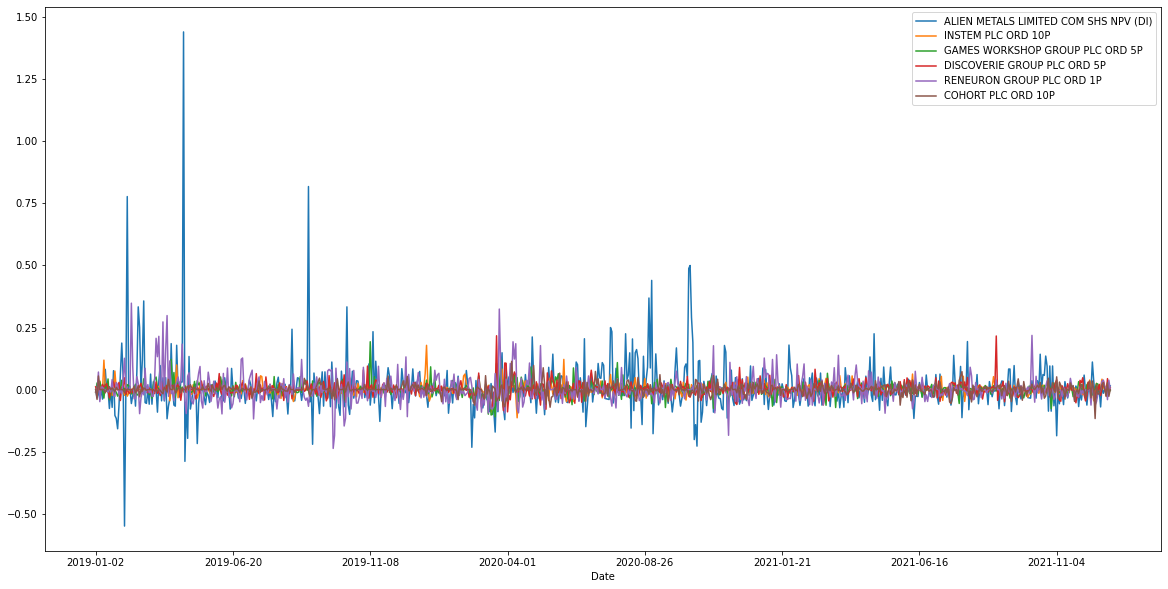

In [53]:
stocks = ['UFO.XLON', 'INS.XLON', 'GAW.XLON', 'DSCV.XLON', 'RENE.XLON', 'CHRT.XLON']

risky_returns = fm.compare_returns (stocks, raw_data, metric, start_date, end_date)
risky_returns.plot(figsize=(20, 10))

## Visualizing wealth, wealth peaks, and drawdown

A more tabgible way of relating to volatility of returns might be by visualizing how the returns affect the invested wealth (in this case we use 1000 as a start wealth). Identifying peaks and lows (troughs) is a step towards calculating drawdown.

A drawdown is a peak-to-trough decline during a specific period for an investment. A drawdown is usually quoted as the percentage between the peak and the subsequent trough.

Drawdown is important for measuring the historical risk of different investments.

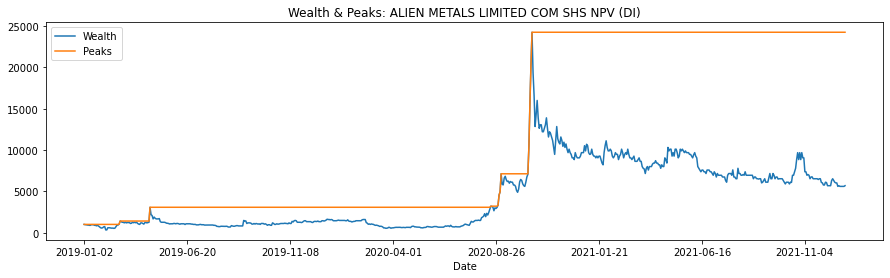

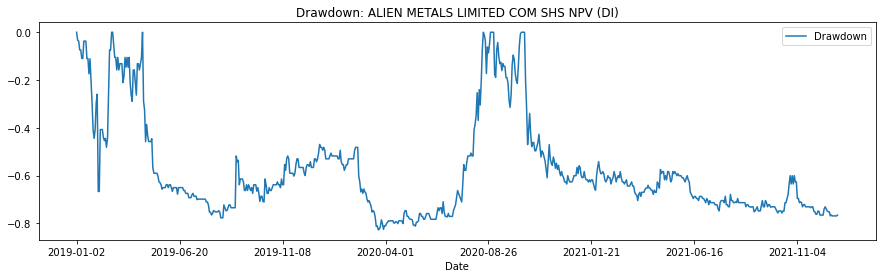

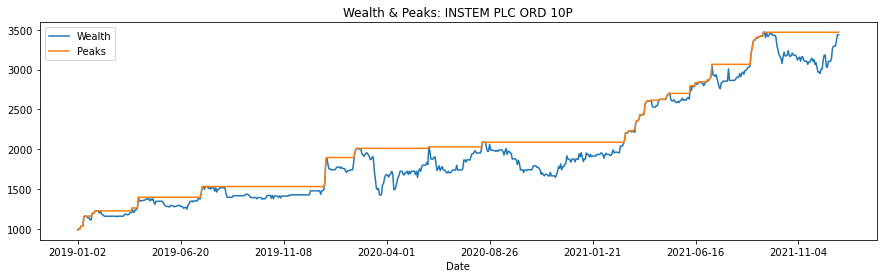

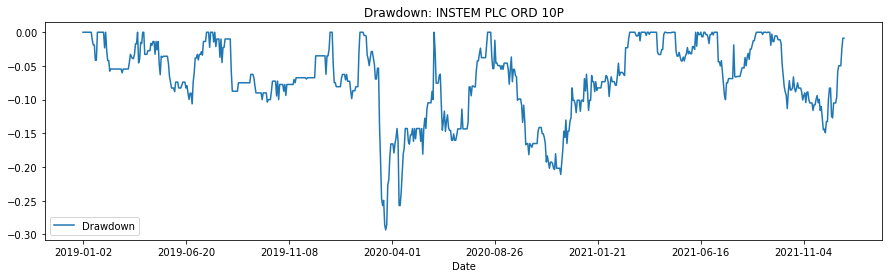

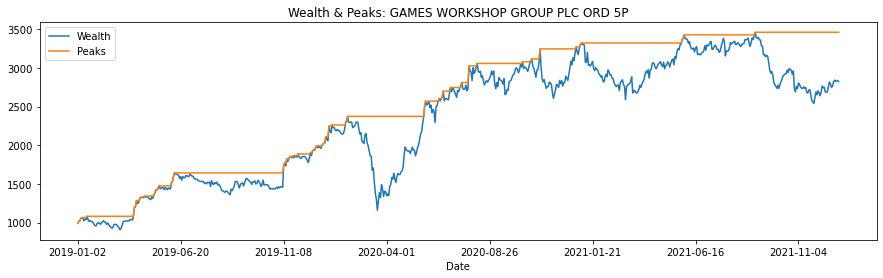

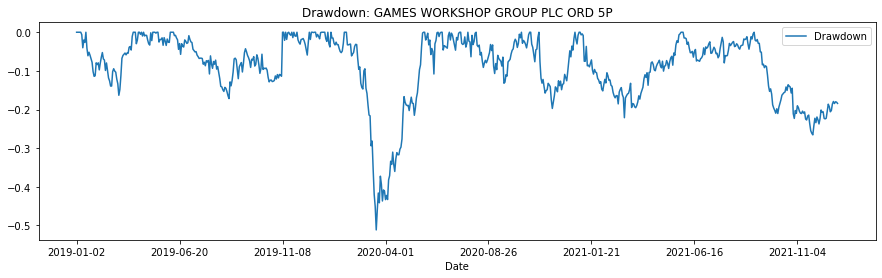

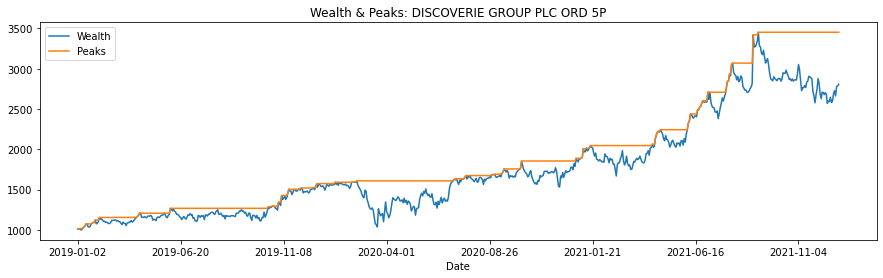

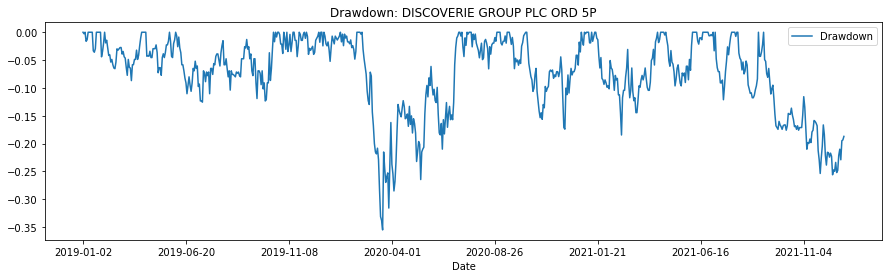

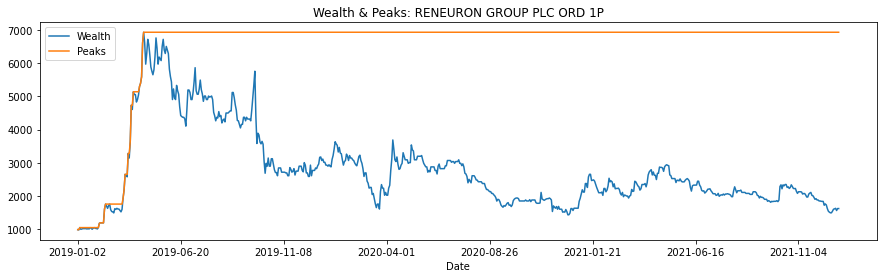

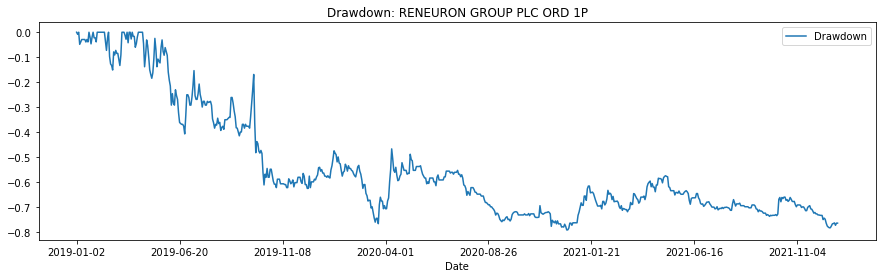

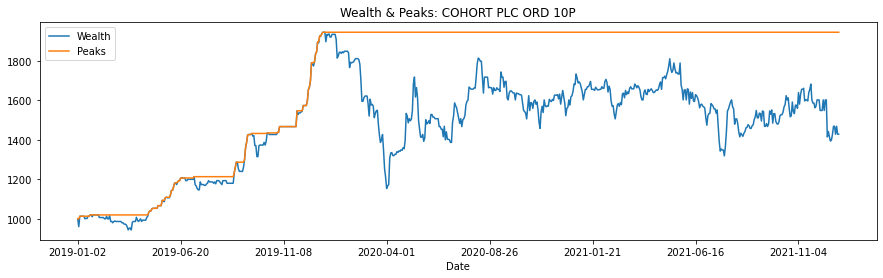

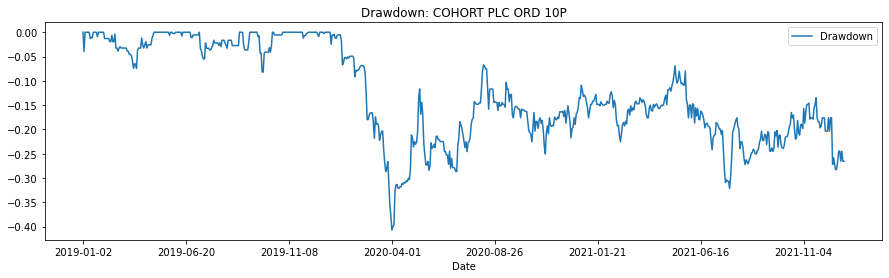

In [106]:
fm.plot_wealth_peaks_drawdown (risky_returns)

## Visualizing distribution of returns

Another way of geting an idea of how returns of different stocks copmare to each other is by visualizing how they are distributed and comparing mean, median, skew, and kurtosis of the distributions.

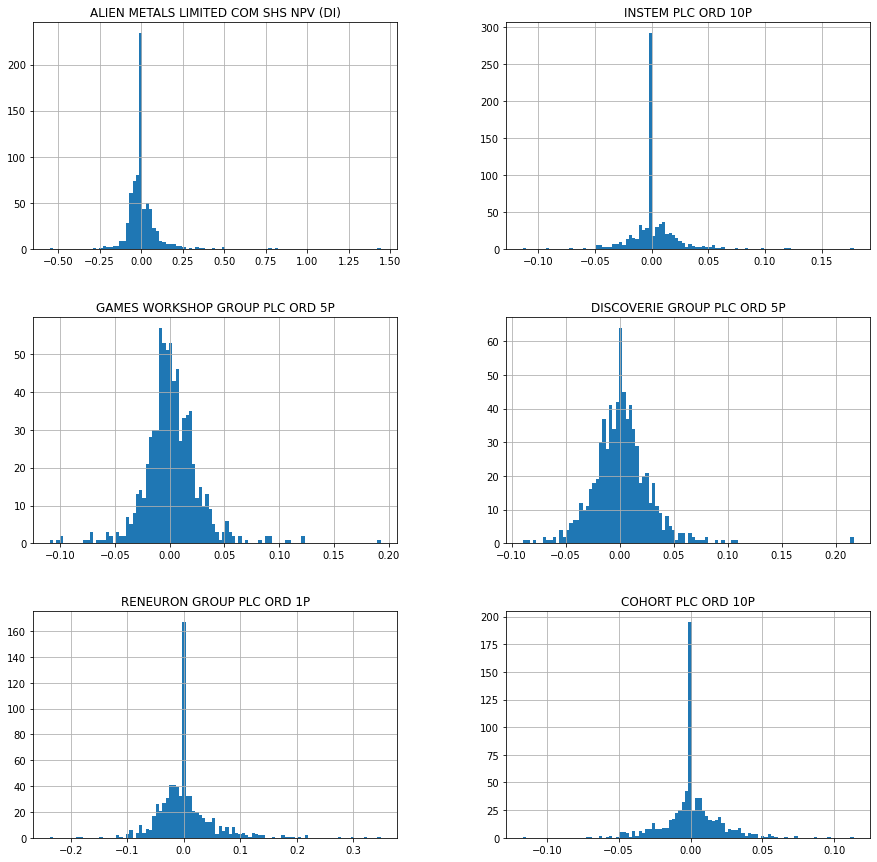

In [15]:
hist = returns_multiple.hist(bins=100, figsize=(15, 15))

In [11]:
key_stats_comparison = (fm.get_stats (returns, metric, start_date, end_date)
                        [['CompanyName', 'PeriodStart', 'PeriodEnd', 'MonthsInPeriod', 'Mean', 'Median', 'Skew', 'Kurtosis']])
key_stats_comparison[key_stats_comparison.index.isin(companies)]

,CompanyName,PeriodStart,PeriodEnd,MonthsInPeriod,Mean,Median,Skew,Kurtosis
CompanyId,,,,,,,,
DSCV.XLON,DISCOVERIE GROUP PLC ORD 5P,2019-01,2021-12,36,0.002,0.0,1.506,10.859
GAW.XLON,GAMES WORKSHOP GROUP PLC ORD 5P,2019-01,2021-12,36,0.002,0.001,0.881,7.647
INS.XLON,INSTEM PLC ORD 10P,2019-01,2021-12,36,0.002,0.0,1.357,12.222
RENE.XLON,RENEURON GROUP PLC ORD 1P,2019-01,2021-12,36,0.002,0.0,1.614,8.316
UFO.XLON,ALIEN METALS LIMITED COM SHS NPV (DI),2019-01,2021-12,36,0.007,0.0,5.177,59.923
CHRT.XLON,COHORT PLC ORD 10P,2019-01,2021-12,36,0.001,0.0,0.132,4.641
